**Phaethon**
-- v.0.1. 

**Donchian Channel x ATR**

Program versi 1 ini adalah untuk backtesting strategi donchian dikombinasikan beberapa indikator 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import requests

In [2]:
import yfinance as yf
assets = ['SOL-USD']
sol_df = yf.download(assets, start="2024-01-01", end="2025-01-01")
sol_df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SOL-USD,SOL-USD,SOL-USD,SOL-USD,SOL-USD
Date,,,,,
2024-01-01,109.508682,109.508682,101.512810,101.512810,2157671990
2024-01-02,106.611221,116.882492,106.388985,109.549065,3782057553
2024-01-03,98.594437,109.848091,92.923668,106.616531,5472216595
2024-01-04,105.077538,107.982468,97.108330,98.586975,3272723247
2024-01-05,99.978790,105.235428,95.942726,105.052010,3022127826
...,...,...,...,...,...
2024-12-27,183.828476,193.753357,182.947128,188.216553,2788285851
2024-12-28,195.013535,195.435440,183.833328,183.833389,2158687217


Donchian 

In [3]:

sol_df.columns = sol_df.columns.droplevel('Ticker')
sol_df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [4]:
n = 20
sol_df['Upper'] = sol_df['High'].rolling(n).max()
sol_df['Lower'] = sol_df['Low'].rolling(n).min()

sol_df.head(25)

Price,Close,High,Low,Open,Volume,Upper,Lower
Date,,,,,,,
2024-01-01,109.508682,109.508682,101.512810,101.512810,2157671990,NaN,NaN
2024-01-02,106.611221,116.882492,106.388985,109.549065,3782057553,NaN,NaN
2024-01-03,98.594437,109.848091,92.923668,106.616531,5472216595,NaN,NaN
2024-01-04,105.077538,107.982468,97.108330,98.586975,3272723247,NaN,NaN
2024-01-05,99.978790,105.235428,95.942726,105.052010,3022127826,NaN,NaN
2024-01-06,93.857719,100.037407,92.022789,99.987991,2235902092,NaN,NaN
2024-01-07,89.276344,96.692398,88.223457,93.860352,2288061692,NaN,NaN
2024-01-08,97.790443,99.761871,85.646698,89.278175,4152448360,NaN,NaN
2024-01-09,99.409187,103.796165,95.893791,97.816032,4070131683,NaN,NaN


**Menggunakan Close Pricing Confirmation**

In [5]:
sol_df['Signal'] = 0
sol_df.loc[sol_df['Close'] > sol_df['Upper'].shift(1), 'Signal'] = 1  # Buy signal
sol_df['Short_Signal'] = 0
sol_df.loc[sol_df['Close'] < sol_df['Lower'].shift(1), 'Short_Signal'] = 1  # Buy signal
sol_df

Price,Close,High,Low,Open,Volume,Upper,Lower,Signal,Short_Signal
Date,,,,,,,,,
2024-01-01,109.508682,109.508682,101.512810,101.512810,2157671990,NaN,NaN,0,0
2024-01-02,106.611221,116.882492,106.388985,109.549065,3782057553,NaN,NaN,0,0
2024-01-03,98.594437,109.848091,92.923668,106.616531,5472216595,NaN,NaN,0,0
2024-01-04,105.077538,107.982468,97.108330,98.586975,3272723247,NaN,NaN,0,0
2024-01-05,99.978790,105.235428,95.942726,105.052010,3022127826,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...
2024-12-27,183.828476,193.753357,182.947128,188.216553,2788285851,241.440720,175.905167,0,0
2024-12-28,195.013535,195.435440,183.833328,183.833389,2158687217,237.457443,175.905167,0,0
2024-12-29,189.744263,197.181076,188.341003,195.022446,2165753102,234.333221,175.905167,0,0


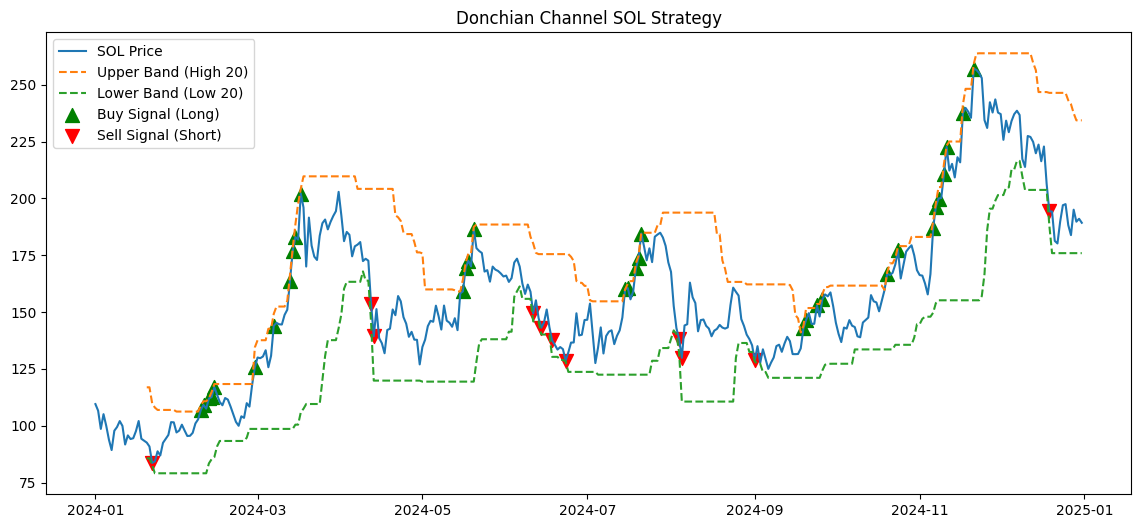

In [6]:
# Plot
plt.figure(figsize=(14,6))
plt.plot(sol_df['Close'], label='SOL Price')
plt.plot(sol_df['Upper'], label='Upper Band (High 20)', linestyle='--')
plt.plot(sol_df['Lower'], label='Lower Band (Low 20)', linestyle='--')

# Plot sinyal beli (LONG)
plt.scatter(sol_df.index[sol_df['Signal'] == 1], 
            sol_df['Close'][sol_df['Signal'] == 1],
            marker='^', color='green', label='Buy Signal (Long)', s=100)

# Plot sinyal jual (SHORT) 
plt.scatter(sol_df.index[sol_df['Short_Signal'] == 1], 
            sol_df['Close'][sol_df['Short_Signal'] == 1],
            marker='v', color='red', label='Sell Signal (Short)', s=100)

plt.legend()
plt.title('Donchian Channel SOL Strategy')
plt.show()

Dari grafik tersebut terkadang memang terjadi false breakout 

Menggunakan volume validation

In [7]:
# Inisialisasi kolom
sol_df['Valid_Long'] = 0
sol_df['Valid_Short'] = 0
sol_df['Volume_MA'] = sol_df['Volume'].rolling(20).mean()
threshold = 1.8 #volume lebih besar dari 1.5

# Syarat valid breakout up
long_condition = (sol_df['Close'] > sol_df['Upper'].shift(1)) & (sol_df['Volume'] > (threshold * sol_df['Volume_MA']))
sol_df.loc[long_condition, 'Valid_Long'] = 1

# Syarat valid breakout down
short_condition = (sol_df['Close'] < sol_df['Lower'].shift(1)) & (sol_df['Volume'] > (threshold * sol_df['Volume_MA']))
sol_df.loc[short_condition, 'Valid_Short'] = 1


In [8]:
sol_df

Price,Close,High,Low,Open,Volume,Upper,Lower,Signal,Short_Signal,Valid_Long,Valid_Short,Volume_MA
Date,,,,,,,,,,,,
2024-01-01,109.508682,109.508682,101.512810,101.512810,2157671990,NaN,NaN,0,0,0,0,NaN
2024-01-02,106.611221,116.882492,106.388985,109.549065,3782057553,NaN,NaN,0,0,0,0,NaN
2024-01-03,98.594437,109.848091,92.923668,106.616531,5472216595,NaN,NaN,0,0,0,0,NaN
2024-01-04,105.077538,107.982468,97.108330,98.586975,3272723247,NaN,NaN,0,0,0,0,NaN
2024-01-05,99.978790,105.235428,95.942726,105.052010,3022127826,NaN,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,183.828476,193.753357,182.947128,188.216553,2788285851,241.440720,175.905167,0,0,0,0,5.140275e+09
2024-12-28,195.013535,195.435440,183.833328,183.833389,2158687217,237.457443,175.905167,0,0,0,0,5.087970e+09
2024-12-29,189.744263,197.181076,188.341003,195.022446,2165753102,234.333221,175.905167,0,0,0,0,4.765747e+09


In [9]:
(sol_df["Valid_Long"]==1).sum()

7

In [10]:
(sol_df["Valid_Short"]==1).sum()

3

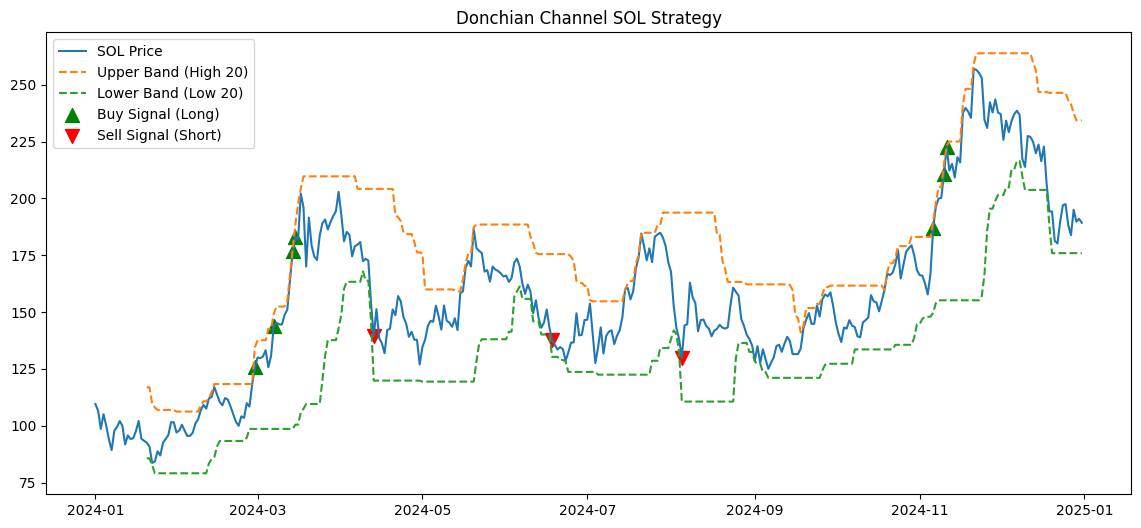

In [11]:
# Plot
plt.figure(figsize=(14,6))
plt.plot(sol_df['Close'], label='SOL Price')
plt.plot(sol_df['Upper'], label='Upper Band (High 20)', linestyle='--')
plt.plot(sol_df['Lower'], label='Lower Band (Low 20)', linestyle='--')

# Plot sinyal beli (LONG)
plt.scatter(sol_df.index[sol_df['Valid_Long'] == 1], 
            sol_df['Close'][sol_df['Valid_Long'] == 1],
            marker='^', color='green', label='Buy Signal (Long)', s=100)

# Plot sinyal jual (SHORT) 
plt.scatter(sol_df.index[sol_df['Valid_Short'] == 1], 
            sol_df['Close'][sol_df['Valid_Short'] == 1],
            marker='v', color='red', label='Sell Signal (Short)', s=100)

plt.legend()
plt.title('Donchian Channel SOL Strategy')
plt.show()

MACD
EMAHari ini = (Harga penutupan saham hari ini * α) + (EMAKemarin * (1 - α))
Ema 12 Ema 26
EMA( -> signal line) menurut Gerald Appel paling optimal

In [12]:
# MACD components
sol_df['EMA12'] = sol_df['Close'].ewm(span=12, adjust=False).mean()
sol_df['EMA26'] = sol_df['Close'].ewm(span=26, adjust=False).mean()
sol_df['MACD_Line'] = sol_df['EMA12'] - sol_df['EMA26']
sol_df['Signal_Line'] = sol_df['MACD_Line'].ewm(span=9, adjust=False).mean()

In [13]:
sol_df

Price,Close,High,Low,Open,Volume,Upper,Lower,Signal,Short_Signal,Valid_Long,Valid_Short,Volume_MA,EMA12,EMA26,MACD_Line,Signal_Line
Date,,,,,,,,,,,,,,,,
2024-01-01,109.508682,109.508682,101.512810,101.512810,2157671990,NaN,NaN,0,0,0,0,NaN,109.508682,109.508682,0.000000,0.000000
2024-01-02,106.611221,116.882492,106.388985,109.549065,3782057553,NaN,NaN,0,0,0,0,NaN,109.062919,109.294056,-0.231136,-0.046227
2024-01-03,98.594437,109.848091,92.923668,106.616531,5472216595,NaN,NaN,0,0,0,0,NaN,107.452383,108.501491,-1.049108,-0.246803
2024-01-04,105.077538,107.982468,97.108330,98.586975,3272723247,NaN,NaN,0,0,0,0,NaN,107.087022,108.247865,-1.160843,-0.429611
2024-01-05,99.978790,105.235428,95.942726,105.052010,3022127826,NaN,NaN,0,0,0,0,NaN,105.993448,107.635341,-1.641893,-0.672068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,183.828476,193.753357,182.947128,188.216553,2788285851,241.440720,175.905167,0,0,0,0,5.140275e+09,196.591732,206.702416,-10.110684,-7.829502
2024-12-28,195.013535,195.435440,183.833328,183.833389,2158687217,237.457443,175.905167,0,0,0,0,5.087970e+09,196.348932,205.836573,-9.487640,-8.161130
2024-12-29,189.744263,197.181076,188.341003,195.022446,2165753102,234.333221,175.905167,0,0,0,0,4.765747e+09,195.332829,204.644550,-9.311720,-8.391248


In [14]:
threshold = 1.8
#Long
sol_df['Last_Buy_Signal'] = 0
# Harga tutup lebih tinggi dari upper band
breakout_condition = sol_df['Close'] > sol_df['Upper'].shift(1)

# Volume lebih tinggi dari rata-rata volume 20 hari
volume_condition = sol_df['Volume'] > (threshold * sol_df['Volume_MA'])

# MACD Line di atas Signal Line
macd_condition = sol_df['MACD_Line'] > sol_df['Signal_Line']

# Kombinasi semua
last_long_condition = (breakout_condition & volume_condition & macd_condition)

sol_df.loc[last_long_condition, 'Last_Buy_Signal'] = 1


In [15]:
threshold = 1.8
#Short
sol_df['Last_Sell_Signal'] = 0
# Harga tutup lebih rendah dari lower band
breakdown_condition = sol_df['Close'] < sol_df['Lower'].shift(1)

# Volume lebih tinggi dari rata-rata volume
volume_condition = sol_df['Volume'] > (threshold * sol_df['Volume_MA'])

# MACD Line di bawah Signal Line
macd_condition = sol_df['MACD_Line'] < sol_df['Signal_Line']

# Kombinasi semua
last_short_condition = (breakdown_condition & volume_condition & macd_condition)

sol_df.loc[last_short_condition, 'Last_Short_Signal'] = 1


In [16]:
(sol_df["Last_Buy_Signal"]==1).sum()

6

In [17]:
(sol_df["Last_Short_Signal"]==1).sum()

3

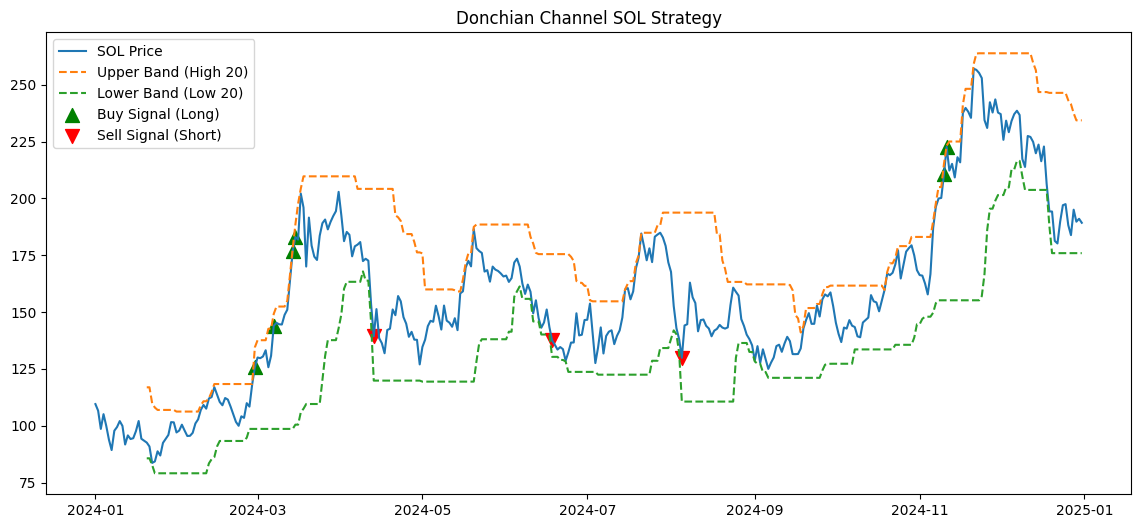

In [18]:
# Plot
plt.figure(figsize=(14,6))
plt.plot(sol_df['Close'], label='SOL Price')
plt.plot(sol_df['Upper'], label='Upper Band (High 20)', linestyle='--')
plt.plot(sol_df['Lower'], label='Lower Band (Low 20)', linestyle='--')

# Plot sinyal beli (LONG)
plt.scatter(sol_df.index[sol_df['Last_Buy_Signal'] == 1], 
            sol_df['Close'][sol_df['Last_Buy_Signal'] == 1],
            marker='^', color='green', label='Buy Signal (Long)', s=100)

# Plot sinyal jual (SHORT) 
plt.scatter(sol_df.index[sol_df['Last_Short_Signal'] == 1], 
            sol_df['Close'][sol_df['Last_Short_Signal'] == 1],
            marker='v', color='red', label='Sell Signal (Short)', s=100)

plt.legend()
plt.title('Donchian Channel SOL Strategy')
plt.show()

In [19]:
#fungsi akhir 
def tigaindikator (data, threshold=1.8,Ndonchian=20, ticker=None) :
    #validasi data
    data.columns = data.columns.droplevel('Ticker')
    # Step 2: Cek apakah kolom price components ada
    required_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
    missing_cols = [col for col in required_cols if col not in data.columns]

    if missing_cols:
        raise ValueError(f"Dataframe masih kurang kolom: {missing_cols}")
    
    #donchian Indicator
    n = Ndonchian
    data['Upper'] = data['High'].rolling(n).max()
    data['Lower'] = data['Low'].rolling(n).min()

    data['Donchian_Buy_Signal'] = 0
    breakout_condition = data['Close'] > data['Upper'].shift(1)
    data.loc[breakout_condition, 'Donchian_Buy_Signal'] = 1 
    data['Donchian_Short_Signal'] = 0
    breakdown_condition = data['Close'] < data['Lower'].shift(1)
    data.loc[breakdown_condition, 'Donchian_Short_Signal'] = 1  

    #volume validation
    data['Volume_Valid_Long'] = 0
    data['Volume_Valid_Short'] = 0
    data['Volume_MA'] = data['Volume'].rolling(n).mean()

    volume_condition = data['Volume'] > (threshold * data['Volume_MA'])    

    long_condition = breakout_condition & volume_condition
    data.loc[long_condition, 'Volume_Valid_Long'] = 1

    short_condition = breakdown_condition & volume_condition
    data.loc[short_condition, 'Volume_Valid_Short'] = 1

    #MACD Validation
    data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD_Line'] = data['EMA12'] - data['EMA26']
    data['Signal_Line'] = data['MACD_Line'].ewm(span=9, adjust=False).mean()

    data['Last_Buy_Signal'] = 0
    data['Last_Short_Signal'] = 0
    macd_long_condition = data['MACD_Line'] > data['Signal_Line']
    last_long_condition = (breakout_condition & volume_condition & macd_long_condition)
    data.loc[last_long_condition, 'Last_Buy_Signal'] = 1

    macd_short_condition = data['MACD_Line'] < data['Signal_Line']
    last_short_condition = (breakdown_condition & volume_condition & macd_short_condition)
    data.loc[last_short_condition, 'Last_Short_Signal'] = 1

    plt.figure(figsize=(14,6))
    
    plt.plot(data['Close'], label=f'{ticker} Price')
    plt.plot(data['Upper'], label=f'Upper Band (High {n})', linestyle='--')
    plt.plot(data['Lower'], label=f'Lower Band (Low {n})', linestyle='--')

    # Plot sinyal beli (LONG)
    plt.scatter(data.index[data['Last_Buy_Signal'] == 1], 
                data['Close'][data['Last_Buy_Signal'] == 1],
                marker='^', color='green', label='Buy Signal (Long)', s=100)

    # Plot sinyal jual (SHORT) 
    plt.scatter(data.index[data['Last_Short_Signal'] == 1], 
                data['Close'][data['Last_Short_Signal'] == 1],
                marker='v', color='red', label='Sell Signal (Short)', s=100)

    plt.legend()
    plt.title('Donchian Channel X MACD & Volume validation Strategy')
    plt.show()

    return data

    

In [20]:
assets2 = ['ADA-USD']
ada_df = yf.download(assets2, start="2024-01-01", end="2025-01-01")
ada_df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD
Date,,,,,
2024-01-01,0.623110,0.623812,0.592739,0.594187,397524048
2024-01-02,0.605667,0.636704,0.603568,0.623141,607247161
2024-01-03,0.557286,0.617962,0.525139,0.605669,1127440527
2024-01-04,0.570567,0.577765,0.552852,0.557277,591385300
2024-01-05,0.541242,0.572709,0.526672,0.570543,632156325
...,...,...,...,...,...
2024-12-27,0.874768,0.911337,0.857433,0.859780,885820827
2024-12-28,0.887817,0.895069,0.867825,0.874775,538128475


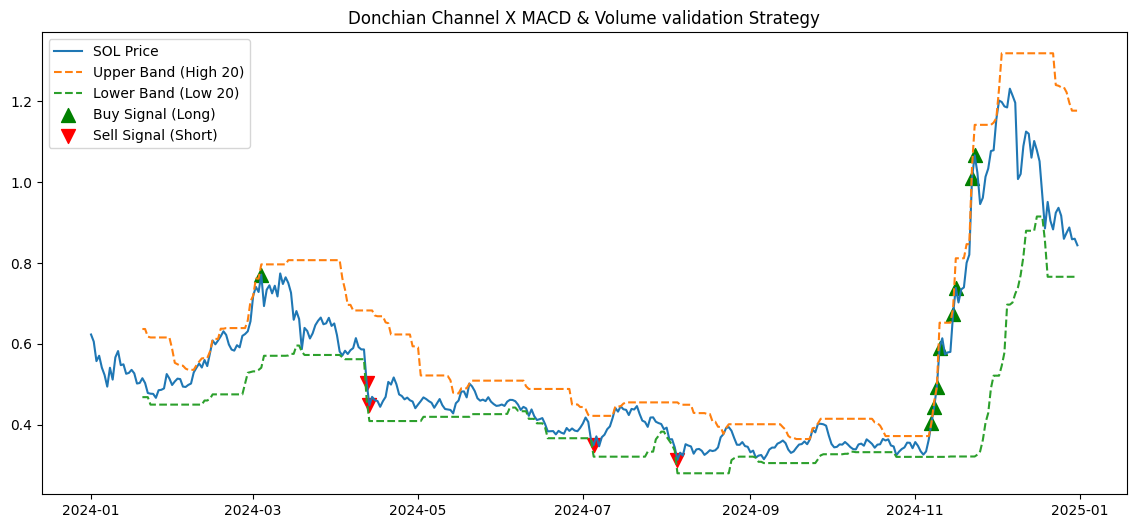

In [21]:
hasil = tigaindikator(ada_df, threshold=1.8, Ndonchian=20, ticker='SOL')

In [22]:
hasil

Price,Close,High,Low,Open,Volume,Upper,Lower,Donchian_Buy_Signal,Donchian_Short_Signal,Volume_Valid_Long,Volume_Valid_Short,Volume_MA,EMA12,EMA26,MACD_Line,Signal_Line,Last_Buy_Signal,Last_Short_Signal
Date,,,,,,,,,,,,,,,,,,
2024-01-01,0.623110,0.623812,0.592739,0.594187,397524048,NaN,NaN,0,0,0,0,NaN,0.623110,0.623110,0.000000,0.000000,0,0
2024-01-02,0.605667,0.636704,0.603568,0.623141,607247161,NaN,NaN,0,0,0,0,NaN,0.620426,0.621818,-0.001391,-0.000278,0,0
2024-01-03,0.557286,0.617962,0.525139,0.605669,1127440527,NaN,NaN,0,0,0,0,NaN,0.610713,0.617038,-0.006325,-0.001488,0,0
2024-01-04,0.570567,0.577765,0.552852,0.557277,591385300,NaN,NaN,0,0,0,0,NaN,0.604536,0.613596,-0.009059,-0.003002,0,0
2024-01-05,0.541242,0.572709,0.526672,0.570543,632156325,NaN,NaN,0,0,0,0,NaN,0.594799,0.608236,-0.013437,-0.005089,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,0.874768,0.911337,0.857433,0.859780,885820827,1.222152,0.765889,0,0,0,0,1.841774e+09,0.936969,0.962841,-0.025871,0.000922,0,0
2024-12-28,0.887817,0.895069,0.867825,0.874775,538128475,1.196415,0.765889,0,0,0,0,1.783728e+09,0.929407,0.957283,-0.027876,-0.004838,0,0
2024-12-29,0.858640,0.907943,0.852290,0.887817,645859774,1.176750,0.765889,0,0,0,0,1.652012e+09,0.918520,0.949977,-0.031456,-0.010161,0,0


In [23]:
assets3 = ['XRP-USD']
xrp_df = yf.download(assets3, start="2024-01-01", end="2025-01-01")
xrp_df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,XRP-USD,XRP-USD,XRP-USD,XRP-USD,XRP-USD
Date,,,,,
2024-01-01,0.630082,0.631275,0.609636,0.615656,729315153
2024-01-02,0.625363,0.638627,0.623182,0.630094,1326197378
2024-01-03,0.582580,0.637770,0.538766,0.625381,3406740412
2024-01-04,0.588226,0.593941,0.572955,0.582577,1452005657
2024-01-05,0.576486,0.589413,0.558444,0.588197,1509144162
...,...,...,...,...,...
2024-12-27,2.141650,2.231316,2.123510,2.154330,5426840159
2024-12-28,2.180824,2.199492,2.135006,2.141667,2759395789


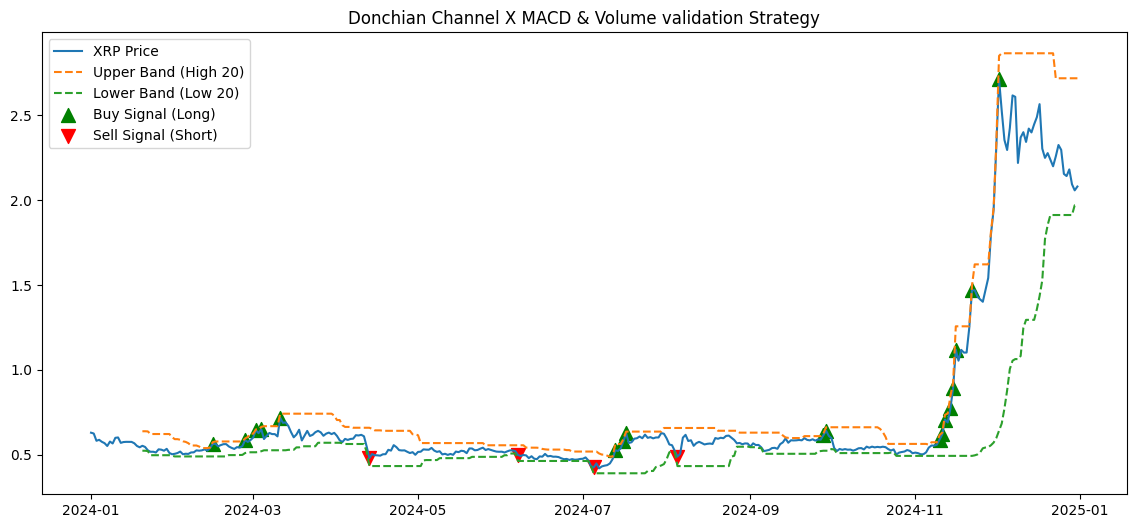

In [24]:
hasil2 = tigaindikator(xrp_df, threshold=1.8, Ndonchian=20, ticker='XRP')

Kode TP dan SL

periode average ATR selama 14 hari - welles wilder founder 

In [58]:
def add_tp_sl (data) :
    
    data['H-L'] = data['High'] - data['Low']
    data['H-PC'] = abs(data['High'] - data['Close'].shift(1))
    data['L-PC'] = abs(data['Low'] - data['Close'].shift(1))
    data['TR'] = data[['H-L', 'H-PC', 'L-PC']].max(axis=1)
    data['ATR'] = data['TR'].rolling(14).mean()

    data['Entry_Price'] = np.where(data['Last_Buy_Signal'] == 1, data['Open'], np.nan)
    data['Take_Profit'] = data['Entry_Price'] + 1.5 * data['ATR']
    data['Stop_Loss'] = data['Entry_Price'] - 1.0 * data['ATR']

    return data

In [59]:
assets4 = ['SOL-USD']
sol_data = yf.download(assets4, start="2024-01-01", end="2025-01-01")
sol_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SOL-USD,SOL-USD,SOL-USD,SOL-USD,SOL-USD
Date,,,,,
2024-01-01,109.508682,109.508682,101.512810,101.512810,2157671990
2024-01-02,106.611221,116.882492,106.388985,109.549065,3782057553
2024-01-03,98.594437,109.848091,92.923668,106.616531,5472216595
2024-01-04,105.077538,107.982468,97.108330,98.586975,3272723247
2024-01-05,99.978790,105.235428,95.942726,105.052010,3022127826
...,...,...,...,...,...
2024-12-27,183.828476,193.753357,182.947128,188.216553,2788285851
2024-12-28,195.013535,195.435440,183.833328,183.833389,2158687217


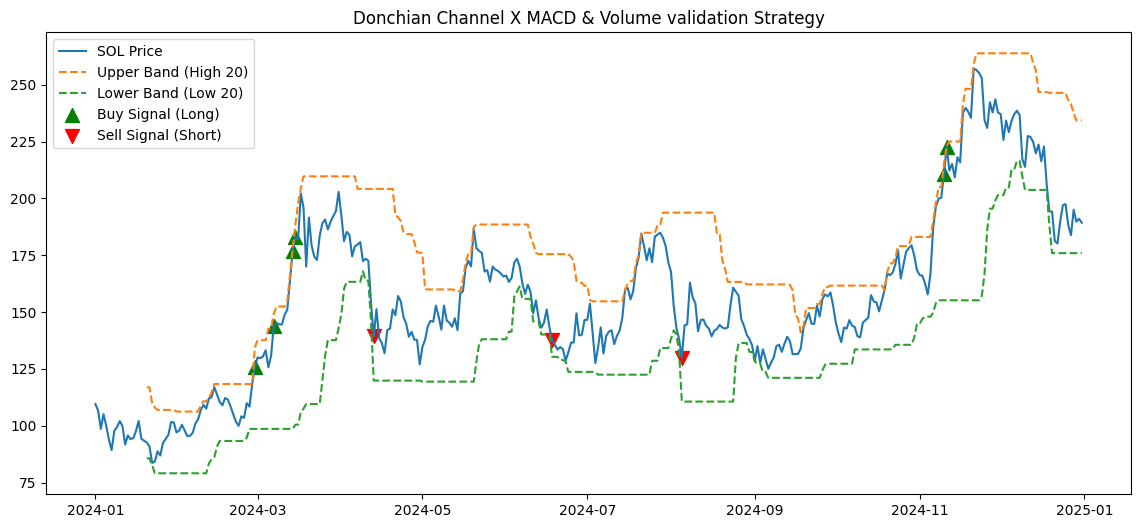

Price,Close,High,Low,Open,Volume,Upper,Lower,Donchian_Buy_Signal,Donchian_Short_Signal,Volume_Valid_Long,Volume_Valid_Short,Volume_MA,EMA12,EMA26,MACD_Line,Signal_Line,Last_Buy_Signal,Last_Short_Signal
Date,,,,,,,,,,,,,,,,,,
2024-01-01,109.508682,109.508682,101.512810,101.512810,2157671990,NaN,NaN,0,0,0,0,NaN,109.508682,109.508682,0.000000,0.000000,0,0
2024-01-02,106.611221,116.882492,106.388985,109.549065,3782057553,NaN,NaN,0,0,0,0,NaN,109.062919,109.294056,-0.231136,-0.046227,0,0
2024-01-03,98.594437,109.848091,92.923668,106.616531,5472216595,NaN,NaN,0,0,0,0,NaN,107.452383,108.501491,-1.049108,-0.246803,0,0
2024-01-04,105.077538,107.982468,97.108330,98.586975,3272723247,NaN,NaN,0,0,0,0,NaN,107.087022,108.247865,-1.160843,-0.429611,0,0
2024-01-05,99.978790,105.235428,95.942726,105.052010,3022127826,NaN,NaN,0,0,0,0,NaN,105.993448,107.635341,-1.641893,-0.672068,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,183.828476,193.753357,182.947128,188.216553,2788285851,241.440720,175.905167,0,0,0,0,5.140275e+09,196.591732,206.702416,-10.110684,-7.829502,0,0
2024-12-28,195.013535,195.435440,183.833328,183.833389,2158687217,237.457443,175.905167,0,0,0,0,5.087970e+09,196.348932,205.836573,-9.487640,-8.161130,0,0
2024-12-29,189.744263,197.181076,188.341003,195.022446,2165753102,234.333221,175.905167,0,0,0,0,4.765747e+09,195.332829,204.644550,-9.311720,-8.391248,0,0


In [60]:
sol_predict = tigaindikator(sol_data, threshold=1.8, Ndonchian=20, ticker='SOL')
sol_predict

In [61]:
sol_trade= add_tp_sl(sol_predict)
sol_trade

Price,Close,High,Low,Open,Volume,Upper,Lower,Donchian_Buy_Signal,Donchian_Short_Signal,Volume_Valid_Long,...,Last_Buy_Signal,Last_Short_Signal,H-L,H-PC,L-PC,TR,ATR,Entry_Price,Take_Profit,Stop_Loss
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,109.508682,109.508682,101.512810,101.512810,2157671990,NaN,NaN,0,0,0,...,0,0,7.995872,NaN,NaN,7.995872,NaN,NaN,NaN,NaN
2024-01-02,106.611221,116.882492,106.388985,109.549065,3782057553,NaN,NaN,0,0,0,...,0,0,10.493507,7.373810,3.119698,10.493507,NaN,NaN,NaN,NaN
2024-01-03,98.594437,109.848091,92.923668,106.616531,5472216595,NaN,NaN,0,0,0,...,0,0,16.924423,3.236870,13.687553,16.924423,NaN,NaN,NaN,NaN
2024-01-04,105.077538,107.982468,97.108330,98.586975,3272723247,NaN,NaN,0,0,0,...,0,0,10.874138,9.388031,1.486107,10.874138,NaN,NaN,NaN,NaN
2024-01-05,99.978790,105.235428,95.942726,105.052010,3022127826,NaN,NaN,0,0,0,...,0,0,9.292702,0.157890,9.134811,9.292702,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,183.828476,193.753357,182.947128,188.216553,2788285851,241.440720,175.905167,0,0,0,...,0,0,10.806229,5.535248,5.270981,10.806229,15.109875,NaN,NaN,NaN
2024-12-28,195.013535,195.435440,183.833328,183.833389,2158687217,237.457443,175.905167,0,0,0,...,0,0,11.602112,11.606964,0.004852,11.606964,15.089108,NaN,NaN,NaN
2024-12-29,189.744263,197.181076,188.341003,195.022446,2165753102,234.333221,175.905167,0,0,0,...,0,0,8.840073,2.167542,6.672531,8.840073,15.066548,NaN,NaN,NaN


In [62]:
(sol_trade["Entry_Price"]).count()

6

Long Only Strategy

In [ ]:
def simulate_trade(data):
    data['Result'] = np.nan  # kolom kosong untuk hasil
    open_trade = False
    entry_index = None

    for i in range(1, len(data)):
        if not open_trade:
            # Cari sinyal beli baru
            if data.iloc[i]['Last_Buy_Signal'] == 1:
                open_trade = True
                entry_index = i  # catat posisi entry
        else:
            # Kalau ada open trade, cek TP atau SL
            high = data.iloc[i]['High']
            low = data.iloc[i]['Low']
            take_profit = data.iloc[entry_index]['Take_Profit']
            stop_loss = data.iloc[entry_index]['Stop_Loss']                 

            if high >= take_profit:
                data.at[data.index[entry_index], 'Result'] = 'TP'
                open_trade = False
            elif low <= stop_loss:
                data.at[data.index[entry_index], 'Result'] = 'SL'
                open_trade = False
                
            else :
                    if data.iloc[i]['Close'] > data.iloc[i]['Open']:
                        data.at[data.index[entry_index], 'Result'] = 'Win_Close>Open'
                    else:
                        data.at[data.index[entry_index], 'Result'] = 'Lose_Close<Open'
                    open_trade = False

    return data


In [102]:
sol_tradesim = simulate_trade(sol_trade)
sol_tradesim

Price,Close,High,Low,Open,Volume,Upper,Lower,Donchian_Buy_Signal,Donchian_Short_Signal,Volume_Valid_Long,...,Last_Short_Signal,H-L,H-PC,L-PC,TR,ATR,Entry_Price,Take_Profit,Stop_Loss,Result
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,109.508682,109.508682,101.512810,101.512810,2157671990,NaN,NaN,0,0,0,...,0,7.995872,NaN,NaN,7.995872,NaN,NaN,NaN,NaN,NaN
2024-01-02,106.611221,116.882492,106.388985,109.549065,3782057553,NaN,NaN,0,0,0,...,0,10.493507,7.373810,3.119698,10.493507,NaN,NaN,NaN,NaN,NaN
2024-01-03,98.594437,109.848091,92.923668,106.616531,5472216595,NaN,NaN,0,0,0,...,0,16.924423,3.236870,13.687553,16.924423,NaN,NaN,NaN,NaN,NaN
2024-01-04,105.077538,107.982468,97.108330,98.586975,3272723247,NaN,NaN,0,0,0,...,0,10.874138,9.388031,1.486107,10.874138,NaN,NaN,NaN,NaN,NaN
2024-01-05,99.978790,105.235428,95.942726,105.052010,3022127826,NaN,NaN,0,0,0,...,0,9.292702,0.157890,9.134811,9.292702,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,183.828476,193.753357,182.947128,188.216553,2788285851,241.440720,175.905167,0,0,0,...,0,10.806229,5.535248,5.270981,10.806229,15.109875,NaN,NaN,NaN,NaN
2024-12-28,195.013535,195.435440,183.833328,183.833389,2158687217,237.457443,175.905167,0,0,0,...,0,11.602112,11.606964,0.004852,11.606964,15.089108,NaN,NaN,NaN,NaN
2024-12-29,189.744263,197.181076,188.341003,195.022446,2165753102,234.333221,175.905167,0,0,0,...,0,8.840073,2.167542,6.672531,8.840073,15.066548,NaN,NaN,NaN,NaN


In [103]:
sol_tradesim["Result"].value_counts()

TP    4
Name: Result, dtype: int64

In [104]:
sol_tradesim[sol_tradesim["Entry_Price"].notna()]

Price,Close,High,Low,Open,Volume,Upper,Lower,Donchian_Buy_Signal,Donchian_Short_Signal,Volume_Valid_Long,...,Last_Short_Signal,H-L,H-PC,L-PC,TR,ATR,Entry_Price,Take_Profit,Stop_Loss,Result
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-29,125.711517,134.465698,117.667519,118.238747,6950123902,134.465698,98.585205,1,0,1,...,0,16.798180,16.413498,0.384682,16.798180,6.966898,118.238747,128.689094,111.271848,TP
2024-03-07,143.977859,149.224731,130.701752,130.742020,7111178325,149.224731,98.585205,1,0,1,...,0,18.522980,18.482712,0.040268,18.522980,10.810219,130.742020,146.957348,119.931801,TP
2024-03-14,176.679749,177.892624,160.233551,163.839935,8399967972,177.892624,98.585205,1,0,1,...,0,17.659073,14.052811,3.606262,17.659073,12.687929,163.839935,182.871829,151.152006,TP
2024-03-15,182.964691,188.501358,165.412720,176.679749,14093348410,188.501358,100.455200,1,0,1,...,0,23.088638,11.821609,11.267029,23.088638,13.482463,176.679749,196.903443,163.197285,NaN
2024-11-10,210.613724,215.179077,198.983109,200.195953,8564655765,215.179077,155.165527,1,0,1,...,0,16.195969,14.984161,1.211807,16.195969,10.213623,200.195953,215.516388,189.982330,TP
2024-11-11,222.641678,223.219803,204.562302,210.613724,10290809023,223.219803,155.165527,1,0,1,...,0,18.657501,12.606079,6.051422,18.657501,11.079465,210.613724,227.232921,199.534259,NaN


With Trailing Stop -- Available soon -- Under Developed

In [55]:
def simulate_trade_with_trailing_stop(data, trailing_stop_pct=0.02):
    data['Result'] = np.nan  # kolom kosong untuk hasil
    open_trade = False
    entry_index = None
    trailing_stop = None

    for i in range(1, len(data)):
        if not open_trade:
            # Cari sinyal beli baru
            if data.iloc[i]['Last_Buy_Signal'] == 1:
                open_trade = True
                entry_index = i  # catat posisi entry
                entry_price = data.iloc[i]['Close']  # harga entry
                trailing_stop = entry_price * (1 - trailing_stop_pct)  # inisialisasi trailing stop

        else:
            high = data.iloc[i]['High']
            low = data.iloc[i]['Low']
            close = data.iloc[i]['Close']
            take_profit = data.iloc[entry_index]['Take_Profit']
            stop_loss = data.iloc[entry_index]['Stop_Loss']

            # Update trailing stop jika harga lebih tinggi dari sebelumnya (untuk posisi beli)
            if high > entry_price and high > trailing_stop:  
                trailing_stop = high * (1 - trailing_stop_pct)  # update trailing stop berdasarkan harga tertinggi

            # Mengecek apakah harga sudah mencapai TP atau SL
            if high >= take_profit:
                data.at[data.index[entry_index], 'Result'] = 'TP'
                open_trade = False
            elif low <= trailing_stop:  # Mengecek trailing stop
                data.at[data.index[entry_index], 'Result'] = 'Trailing SL'
                open_trade = False
            elif low <= stop_loss:
                data.at[data.index[entry_index], 'Result'] = 'SL'
                open_trade = False

    return data


In [56]:
sol_tradesim2 = simulate_trade_with_trailing_stop(sol_trade)
sol_tradesim2

Price,Close,High,Low,Open,Volume,Upper,Lower,Donchian_Buy_Signal,Donchian_Short_Signal,Volume_Valid_Long,...,Last_Short_Signal,H-L,H-PC,L-PC,TR,ATR,Entry_Price,Take_Profit,Stop_Loss,Result
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,109.508682,109.508682,101.512810,101.512810,2157671990,NaN,NaN,0,0,0,...,0,7.995872,NaN,NaN,7.995872,NaN,NaN,NaN,NaN,NaN
2024-01-02,106.611221,116.882492,106.388985,109.549065,3782057553,NaN,NaN,0,0,0,...,0,10.493507,7.373810,3.119698,10.493507,NaN,NaN,NaN,NaN,NaN
2024-01-03,98.594437,109.848091,92.923668,106.616531,5472216595,NaN,NaN,0,0,0,...,0,16.924423,3.236870,13.687553,16.924423,NaN,NaN,NaN,NaN,NaN
2024-01-04,105.077538,107.982468,97.108330,98.586975,3272723247,NaN,NaN,0,0,0,...,0,10.874138,9.388031,1.486107,10.874138,NaN,NaN,NaN,NaN,NaN
2024-01-05,99.978790,105.235428,95.942726,105.052010,3022127826,NaN,NaN,0,0,0,...,0,9.292702,0.157890,9.134811,9.292702,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,183.828476,193.753357,182.947128,188.216553,2788285851,241.440720,175.905167,0,0,0,...,0,10.806229,5.535248,5.270981,10.806229,15.109875,NaN,NaN,NaN,NaN
2024-12-28,195.013535,195.435440,183.833328,183.833389,2158687217,237.457443,175.905167,0,0,0,...,0,11.602112,11.606964,0.004852,11.606964,15.089108,NaN,NaN,NaN,NaN
2024-12-29,189.744263,197.181076,188.341003,195.022446,2165753102,234.333221,175.905167,0,0,0,...,0,8.840073,2.167542,6.672531,8.840073,15.066548,NaN,NaN,NaN,NaN


In [57]:
sol_tradesim[sol_tradesim["Entry_Price"].notna()]

Price,Close,High,Low,Open,Volume,Upper,Lower,Donchian_Buy_Signal,Donchian_Short_Signal,Volume_Valid_Long,...,Last_Short_Signal,H-L,H-PC,L-PC,TR,ATR,Entry_Price,Take_Profit,Stop_Loss,Result
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-29,125.711517,134.465698,117.667519,118.238747,6950123902,134.465698,98.585205,1,0,1,...,0,16.798180,16.413498,0.384682,16.798180,6.966898,125.711517,136.161865,118.744619,TP
2024-03-07,143.977859,149.224731,130.701752,130.742020,7111178325,149.224731,98.585205,1,0,1,...,0,18.522980,18.482712,0.040268,18.522980,10.810219,143.977859,160.193188,133.167641,Trailing SL
2024-03-14,176.679749,177.892624,160.233551,163.839935,8399967972,177.892624,98.585205,1,0,1,...,0,17.659073,14.052811,3.606262,17.659073,12.687929,176.679749,195.711643,163.991819,Trailing SL
2024-03-15,182.964691,188.501358,165.412720,176.679749,14093348410,188.501358,100.455200,1,0,1,...,0,23.088638,11.821609,11.267029,23.088638,13.482463,182.964691,203.188386,169.482228,NaN
2024-11-10,210.613724,215.179077,198.983109,200.195953,8564655765,215.179077,155.165527,1,0,1,...,0,16.195969,14.984161,1.211807,16.195969,10.213623,210.613724,225.934158,200.400101,Trailing SL
2024-11-11,222.641678,223.219803,204.562302,210.613724,10290809023,223.219803,155.165527,1,0,1,...,0,18.657501,12.606079,6.051422,18.657501,11.079465,222.641678,239.260875,211.562213,NaN
